In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
from keras.utils import to_categorical
from sklearn import ensemble, preprocessing, metrics, model_selection
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data/multilabel_data.csv')

In [3]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature241,feature242,feature243,label1,label2,label3,label4,label5,label6,label7
0,0,0,0,0,3,3,0,0,0,0,...,0,0,0,False,False,False,True,False,False,False
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,False,False,False,True,False,False,True
2,1,0,0,0,0,0,0,0,0,0,...,0,0,2,False,True,False,False,False,False,False
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,False,False,True,False,False,False,False
4,1,0,1,0,0,0,7,5,2,0,...,0,0,0,False,False,True,False,False,False,True


In [4]:
data_y = data[['label1','label2','label3','label4','label5','label6','label7']]
data_x = data.drop(columns=['label1','label2','label3','label4','label5','label6','label7'])

In [5]:
for i in data_y.columns:
    data_y.loc[data_y[i] == False, i] = 0
    data_y.loc[data_y[i] == True, i] = 1
    data_y[i] = data_y[i].astype(int)

In [6]:
train_x , test_x , train_y , test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [7]:
clf = RandomForestClassifier(n_estimators=100,
                             n_jobs=-1,
                             random_state=42)

In [8]:
clf.fit(np.array(train_x),np.array(train_y))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [9]:
from ks_gini_cap30_AUC_multilabel import ks_gini_cap30_AUC

In [10]:
result = ks_gini_cap30_AUC(7,np.array(clf.predict_proba(np.array(test_x))),np.array(test_y),do_cate = True)

Complete! Cost 0.0s


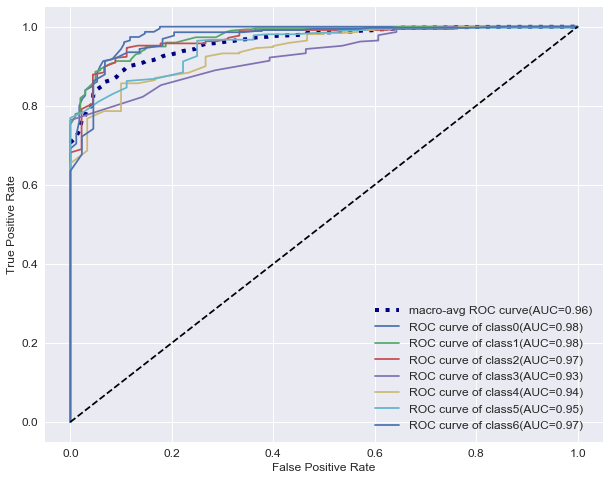

In [11]:
result.ROC_AUC_plot()

In [12]:
result.calculate_auc(num = 6)

0.9708248212461695

In [13]:
result.calculate_cap30(num = 6)

0.9545454545454546

In [14]:
result.calculate_ks(num = 6)

0.7318181818181817

In [15]:
result.calculate_gini(num = 6)

0.8318181818181818

In [16]:
result.calculate_all(num = 6)

,ks,gini,cap30,auc
6,0.731818,0.831818,0.954545,0.970825


In [17]:
result.calculate_detail(num = 6)

,rank,人數,累積人數,y,累積y,y率,KS,Gini
0,1,40,40,35,35,0.875,0.695455,0.079545
1,2,40,80,6,41,0.150,0.731818,0.040909
2,3,40,120,1,42,0.025,0.654545,0.011364
3,4,40,160,1,43,0.025,0.577273,0.015909
4,5,40,200,1,44,0.025,0.500000,0.020455
5,6,40,240,0,44,0.000,0.400000,0.000000
6,7,40,280,0,44,0.000,0.300000,0.000000
7,8,40,320,0,44,0.000,0.200000,0.000000
8,9,40,360,0,44,0.000,0.100000,0.000000
9,10,40,400,0,44,0.000,0.000000,0.000000
